In [1]:
import numpy as np
import sklearn

In [4]:
# Matrix-Vector Products

# A = Sources ==> Destination
A = np.array([[.9,.07,.02,.01],              
              [0,0.93,.05,.02],
              [0,0,.85,.15],
              [0,0,0,1.0]])

# X = sources
X = np.array([.85,.10,.05,0])

print(A)
print(" ")
print(X)
print("the percentage of each health state in 1 year:\n")

print(A.T@X.T)

[[0.9  0.07 0.02 0.01]
 [0.   0.93 0.05 0.02]
 [0.   0.   0.85 0.15]
 [0.   0.   0.   1.  ]]
 
[0.85 0.1  0.05 0.  ]
the percentage of each health state in 1 year:

[0.765  0.1525 0.0645 0.018 ]


In [7]:
# Matrix-Matrix Products

quantity = np.array([[6,5,3,1],
                    [3,6,2,2],
                    [3,4,3,1]])
rates = np.array([[1.5,1],[2,2.5],[5,4.5],[16,17]])

print(quantity@rates)

np.dot(quantity,rates)


[[50.  49. ]
 [58.5 61. ]
 [43.5 43.5]]


array([[50. , 49. ],
       [58.5, 61. ],
       [43.5, 43.5]])

In [9]:
# Accuracy

#Floating Point Arithmetic
import scipy.linalg as la

a = np.array([[1.,1000],[0,1]])
b = np.array([[1,1000],[0.001,1]])

print(a)
print("\n")
print(b)



[[   1. 1000.]
 [   0.    1.]]


[[1.e+00 1.e+03]
 [1.e-03 1.e+00]]


In [10]:
np.set_printoptions(suppress = True,precision=4)

wA, vrA = la.eig(a)
wB, vrB = la.eig(b)

print("wA:\t",wA)
print("wB:\t",wB)

wA:	 [1.+0.j 1.+0.j]
wB:	 [ 2.+0.j -0.+0.j]


In [11]:
#################################################
# Intro to Convolutions
########################################

In [12]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.linalg import norm


In [13]:
from PIL import Image

In [15]:
from matplotlib import pyplot as plt, rcParams, rc
#from matlab import imread
from skimage.measure import block_reduce
import pickle as pickle
from scipy.ndimage.filters import correlate, convolve
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [20]:
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    # plt.show(im)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

In [25]:
### MNIST Data
#from sklearn.datasets import fetch_mldata
#mnist = fetch_mldata('MNIST original')
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [26]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [27]:
mnist["data"].shape, mnist["target"].shape

((70000, 784), (70000,))

In [33]:
print(mnist["data"].shape)
mnist["data"]

(70000, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
arr = np.array(mnist["data"])
images = np.reshape(arr, (70000, 28, 28))

In [36]:
labels = mnist['target'].astype(int)

In [37]:
n=len(images)
images.shape, labels.shape

((70000, 28, 28), (70000,))

In [38]:
n

70000

In [39]:
images = images/255

In [40]:
images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

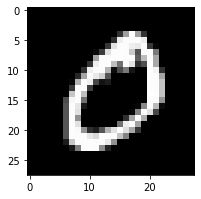

In [42]:
plot(images[1])

In [43]:
labels[0]

5

In [44]:
labels[1]

0

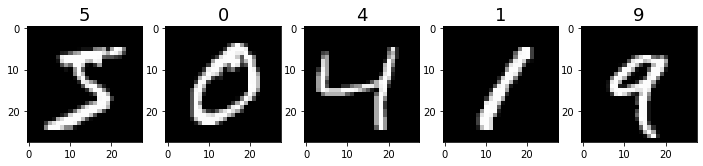

In [45]:
plots(images[:5], titles=labels[:5])

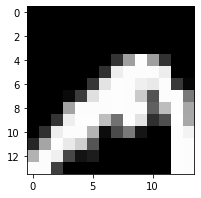

In [47]:
plot(images[1,0:14, 8:22])

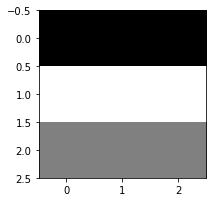

In [48]:
################################
# EDGE DETECTION
top=[[-1,-1,-1],
     [ 1, 1, 1],
     [ 0, 0, 0]]

plot(top)



In [51]:
dims = np.index_exp[10:28:1,3:13]
images[1][dims]

array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0392, 0.2353],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.6392, 0.9882],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.2   , 0.9333, 0.9922],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.1882, 0.9333, 0.9882, 0.9882],
       [0.    , 0.   

In [52]:
corrtop = correlate(images[0], top)

In [53]:
corrtop[dims]

array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.0118,  0.0824],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.1176,  0.2588,  0.6275,  1.1137,  1.6275,  2.1804],
       [ 0.    ,  0.    ,  0.    ,  0.1922,  1.0078,  1.8588,  2.2902,  1.8627,  1.3373,  0.7137],
       [ 0.    ,  0.    ,  0.    , -0.1216, -0.1961, -0.1961, -0.0745,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    , -0.0706, -0.6157, -0.9961, -1.498 , -0.9529, -0.5725, -0.1882],
       [ 0

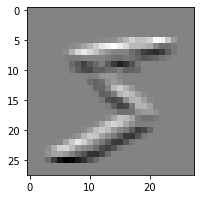

In [54]:
plot(corrtop)

In [55]:
np.rot90(top,1)

array([[-1,  1,  0],
       [-1,  1,  0],
       [-1,  1,  0]])

True

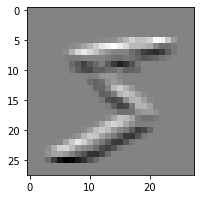

In [56]:
convtop = convolve(images[0], np.rot90(top,2))
plot(convtop)
np.allclose(convtop, corrtop)

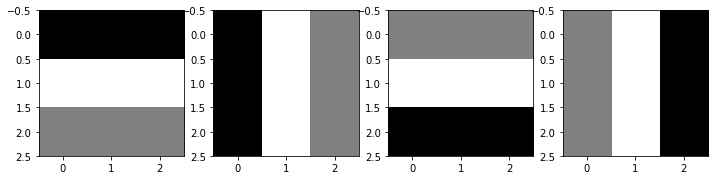

In [57]:
straights=[np.rot90(top,i) for i in range(4)]
plots(straights)

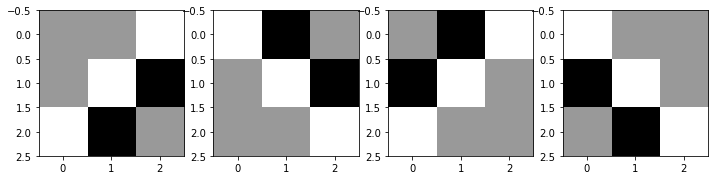

In [58]:
br=[[ 0, 0, 1],
    [ 0, 1,-1.5],
    [ 1,-1.5, 0]]

diags = [np.rot90(br,i) for i in range(4)]
plots(diags)

In [59]:
diags

[array([[ 0. ,  0. ,  1. ],
        [ 0. ,  1. , -1.5],
        [ 1. , -1.5,  0. ]]),
 array([[ 1. , -1.5,  0. ],
        [ 0. ,  1. , -1.5],
        [ 0. ,  0. ,  1. ]]),
 array([[ 0. , -1.5,  1. ],
        [-1.5,  1. ,  0. ],
        [ 1. ,  0. ,  0. ]]),
 array([[ 1. ,  0. ,  0. ],
        [-1.5,  1. ,  0. ],
        [ 0. , -1.5,  1. ]])]

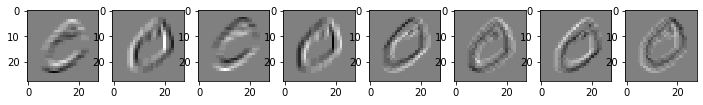

In [60]:
rots = straights + diags
corrs = [correlate(images[1], rot) for rot in rots]
plots(corrs)

In [61]:
eights=[images[i] for i in range(n) if labels[i]==8]
ones=[images[i] for i in range(n) if labels[i]==1]

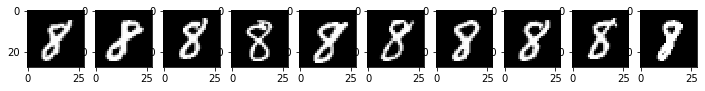

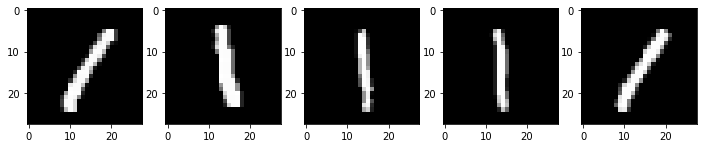

In [63]:
plots(eights[:10])
plots(ones[:5])

In [64]:
def normalize(arr): return (arr-arr.mean())/arr.std()

In [72]:
#pool1 = [np.array([pool(correlate(im, rot)) for im in ones]) for rot in rots]
#filts1 = np.array([ims.mean(axis=0) for ims in pool1])
#filts1 = normalize(filts1)

In [74]:
#[np.array([is8_n2(im) for im in ims]).sum() for ims in [eights,ones]]

In [75]:
#plot(filts8)

In [76]:
##filts8 = normalize(filts8)
#plots(filts8)

In [ ]:
##################### Thankyou #####################